In [7]:
# import pandas for data handling 
import pandas as pd 

# load csv file into a pandas DataFrame, parsing "Date" column as datetime 
df = pd.read_csv("sales_data.csv", parse_dates=["Date"]) 

# display first 5 rows to check data loaded correctly 
df.head() 

,Date,Product Type,Color,Quantity Sold,Season
0,2023-01-15,jersey alg 30/1,Navy Blue,120,Winter
1,2023-02-10,bb rib 30/1,Soft Pink,95,Winter
2,2023-03-12,jersey alg 24/1,Lime Green,40,Spring
3,2023-04-20,rib liso 24/1,White,60,Spring
4,2023-05-18,frisa inv. 30/70/12,Coral Red,100,Summer


In [8]:
# check for missing values in the DataFrame 
print("Missing values per column:\n", df.isnull().sum())

# display unique values in important columns 
print("\nUnique Colors:", df["Color"].unique())
print("\nUnique Product Types:", df["Product Type"].unique())
print("\nUnique Seasons:", df["Season"].unique())

Missing values per column:
 Date             0
Product Type     0
Color            0
Quantity Sold    0
Season           0
dtype: int64

Unique Colors: ['Navy Blue' 'Soft Pink' 'Lime Green' 'White' 'Coral Red' 'Beige' 'Black']

Unique Product Types: ['jersey alg 30/1' 'bb rib 30/1' 'jersey alg 24/1' 'rib liso 24/1'
 'frisa inv. 30/70/12' 'puño 2*1 alg 24/70' 'frisa inv. 24/70/10'
 'bb rib alg poli 30/20' 'bb rib alg poli 36/20']

Unique Seasons: ['Winter' 'Spring' 'Summer' 'Fall']


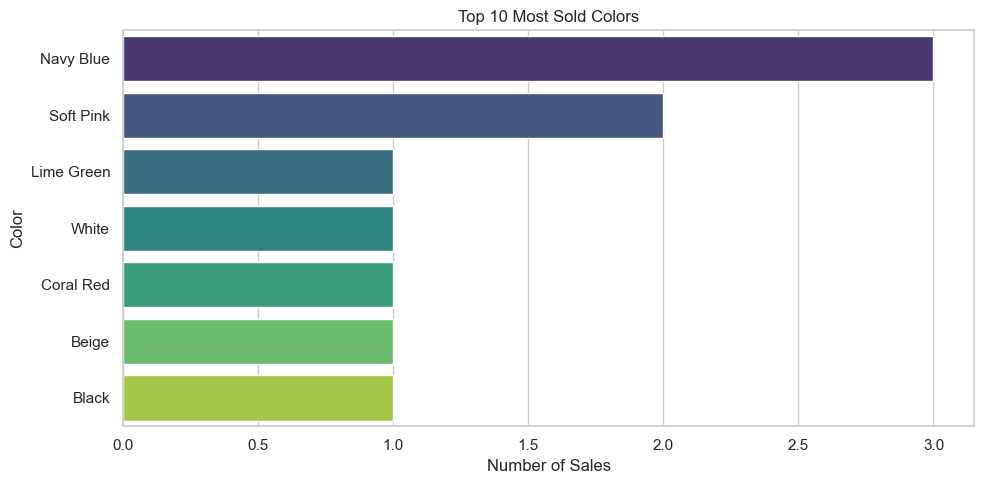

In [9]:
# import plotting libraries 
import matplotlib.pyplot as plt 
import seaborn as sns

# set seaborn style
sns.set(style="whitegrid") 

# count sales frequency per color 
color_counts = df["Color"].value_counts() 

# Plot top 10 colors by sales frequency 
plt.figure(figsize=(10, 5)) 
sns.barplot(
    y=color_counts.index[:10],
    x=color_counts.values[:10],
    hue=color_counts.index[:10],   # assign hue
    palette="viridis",
    dodge=False,                   # avoids double bars
    legend=False                   # hide repeated legend
)
plt.title("Top 10 Most Sold Colors")
plt.xlabel("Number of Sales")
plt.ylabel("Color") 
plt.tight_layout()
plt.show() 

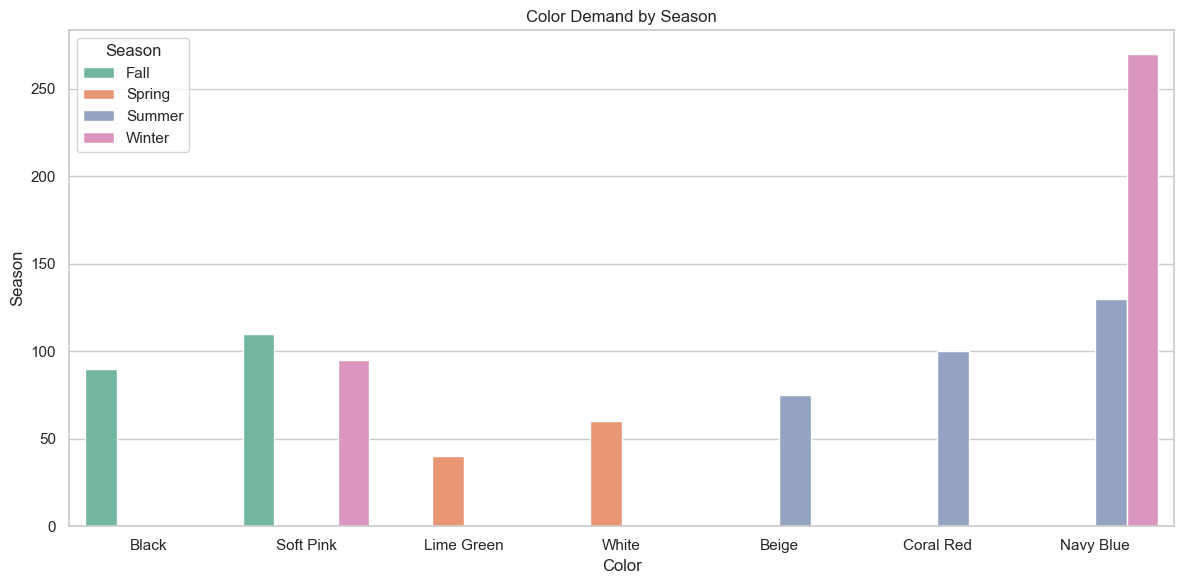

In [10]:
# group data by season and color, sum quantities sold 
season_color = df.groupby(["Season", "Color"])["Quantity Sold"].sum().reset_index() 

# plot grouped bar chart for color demand by season 
plt.figure(figsize=(12,6))
sns.barplot(
    x="Color", 
    y="Quantity Sold", 
    hue="Season", 
    data=season_color, 
    palette="Set2"
)
plt.title("Color Demand by Season") 
plt.xlabel("Color")
plt.ylabel("Season") 
plt.tight_layout() 
plt.show() 

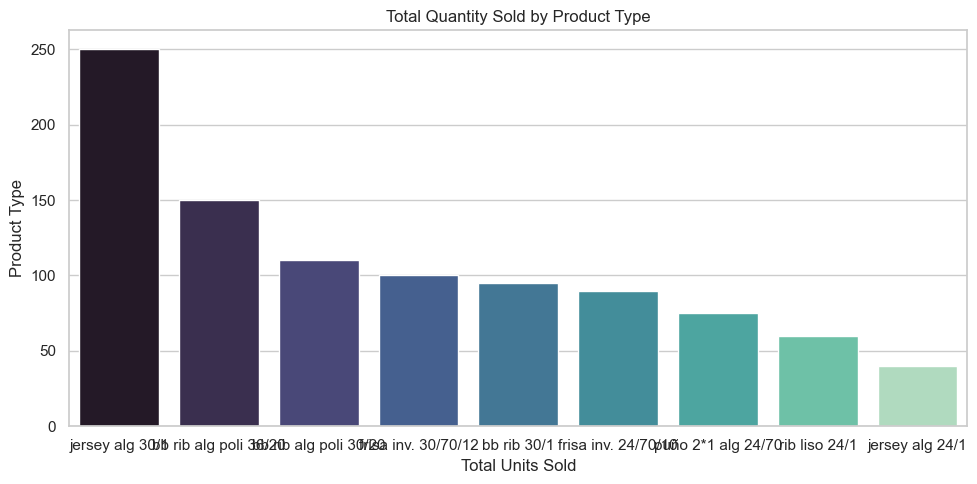

In [14]:
# analyize sales trend by product type 
product_sales = df.groupby("Product Type")["Quantity Sold"].sum().sort_values(ascending=False)

# plot horizontal bar chart of product sales 
plt.figure(figsize=(10,5))
sns.barplot(
    y=product_sales.values, 
    x=product_sales.index, 
    palette="mako",
    hue=product_sales.index,  # assign hue
)
plt.title("Total Quantity Sold by Product Type")
plt.xlabel("Total Units Sold")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show() 